In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import load_datasets
from utils.model_utils import initialize_model
from utils.train_utils import train_model
from utils.metrics import evaluate_model
from utils.visualization import plot_training, plot_confusion_matrix

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
num_epochs = 20
learning_rate = 0.001
num_classes = 2

In [6]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="augmented")
print("[INFO] Augmented datasets loaded successfully!")



[INFO] Loading augmented datasets...
[INFO] Augmented datasets loaded successfully!


In [7]:
print("\n[INFO] Starting Training for Model: vgg16 with Augmented Data\n")
print("[INFO] Initializing VGG16 model...")
model = initialize_model(
    model_name="convnext_tiny",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Augmented data: still freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: vgg16 with Augmented Data

[INFO] Initializing VGG16 model...
[INFO] Model initialized successfully!


In [8]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [10]:
print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for this stage
    device=device,
    save_path="outputs/models/augmented/convnext_tiny.pt",
    early_stop_patience=5,  # Stop after 5 epochs without improvement
    monitor_metric="val_loss"

)
print("[INFO] Training completed successfully!")

[INFO] Starting model training with augmented data...

Starting training...



Epoch [1]: Train Loss: 0.4972, Train Acc: 0.7477 | Val Loss: 0.4143, Val Acc: 0.8209, Val Recall: 0.9065, Val F1: 0.8610
[INFO] Best model saved with val_loss: 0.4143


Epoch [2]: Train Loss: 0.4024, Train Acc: 0.8182 | Val Loss: 0.3827, Val Acc: 0.8358, Val Recall: 0.9228, Val F1: 0.8731
[INFO] Best model saved with val_loss: 0.3827


Epoch [3]: Train Loss: 0.3812, Train Acc: 0.8230 | Val Loss: 0.3837, Val Acc: 0.8184, Val Recall: 0.9268, Val F1: 0.8620
[INFO] No improvement in val_loss. Patience: 1/5


Epoch [4]: Train Loss: 0.3623, Train Acc: 0.8325 | Val Loss: 0.3626, Val Acc: 0.8308, Val Recall: 0.9268, Val F1: 0.8702
[INFO] Best model saved with val_loss: 0.3626


Epoch [5]: Train Loss: 0.3480, Train Acc: 0.8378 | Val Loss: 0.3542, Val Acc: 0.8557, Val Recall: 0.9268, Val F1: 0.8872
[INFO] Best model saved with val_loss: 0.3542


Epoch [6]: Train Loss: 0.3465, Train Acc: 0.8341 | Val Loss: 0.3556, Val Acc: 0.8284, Val Recall: 0.8821, Val F1: 0.8628
[INFO] No improvement in val_loss. Patience: 1/5


Epoch [7]: Train Loss: 0.3209, Train Acc: 0.8516 | Val Loss: 0.3377, Val Acc: 0.8532, Val Recall: 0.9309, Val F1: 0.8859
[INFO] Best model saved with val_loss: 0.3377


Epoch [8]: Train Loss: 0.3392, Train Acc: 0.8325 | Val Loss: 0.3468, Val Acc: 0.8532, Val Recall: 0.9390, Val F1: 0.8868
[INFO] No improvement in val_loss. Patience: 1/5


Epoch [9]: Train Loss: 0.3333, Train Acc: 0.8426 | Val Loss: 0.3481, Val Acc: 0.8259, Val Recall: 0.8862, Val F1: 0.8617
[INFO] No improvement in val_loss. Patience: 2/5


Epoch [10]: Train Loss: 0.3226, Train Acc: 0.8559 | Val Loss: 0.3195, Val Acc: 0.8532, Val Recall: 0.8984, Val F1: 0.8822
[INFO] Best model saved with val_loss: 0.3195


Epoch [11]: Train Loss: 0.3102, Train Acc: 0.8622 | Val Loss: 0.3299, Val Acc: 0.8383, Val Recall: 0.8455, Val F1: 0.8649
[INFO] No improvement in val_loss. Patience: 1/5


Epoch [12]: Train Loss: 0.3188, Train Acc: 0.8569 | Val Loss: 0.3558, Val Acc: 0.8607, Val Recall: 0.9512, Val F1: 0.8931
[INFO] No improvement in val_loss. Patience: 2/5


Epoch [13]: Train Loss: 0.3046, Train Acc: 0.8521 | Val Loss: 0.3369, Val Acc: 0.8433, Val Recall: 0.8699, Val F1: 0.8717
[INFO] No improvement in val_loss. Patience: 3/5


Epoch [14]: Train Loss: 0.3078, Train Acc: 0.8617 | Val Loss: 0.3354, Val Acc: 0.8682, Val Recall: 0.9431, Val F1: 0.8975
[INFO] No improvement in val_loss. Patience: 4/5


Epoch [15]: Train Loss: 0.2974, Train Acc: 0.8659 | Val Loss: 0.3462, Val Acc: 0.8582, Val Recall: 0.8984, Val F1: 0.8858
[INFO] No improvement in val_loss. Patience: 5/5
[INFO] Training stopped after 15 epochs.

[INFO] Training completed successfully!


In [11]:
# Evaluate Model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for VGG16 with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...

[INFO] Metrics for VGG16 with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.8407643312101911, 'recall': 0.8301886792452831, 'f1-score': 0.8354430379746836, 'support': 159.0}, 'Fire': {'precision': 0.8932806324110671, 'recall': 0.900398406374502, 'f1-score': 0.8968253968253969, 'support': 251.0}, 'accuracy': 0.8731707317073171, 'macro avg': {'precision': 0.8670224818106291, 'recall': 0.8652935428098925, 'f1-score': 0.8661342174000402, 'support': 410.0}, 'weighted avg': {'precision': 0.8729145546282884, 'recall': 0.8731707317073171, 'f1-score': 0.8730210186369496, 'support': 410.0}}, 'confusion_matrix': array([[132,  27],
       [ 25, 226]]), 'roc_auc': np.float64(0.8652935428098926)}


[INFO] Saving training and evaluation results...


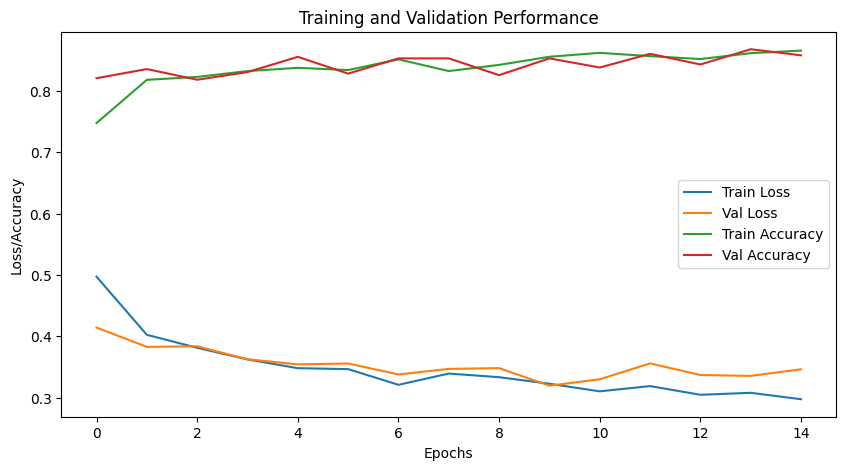

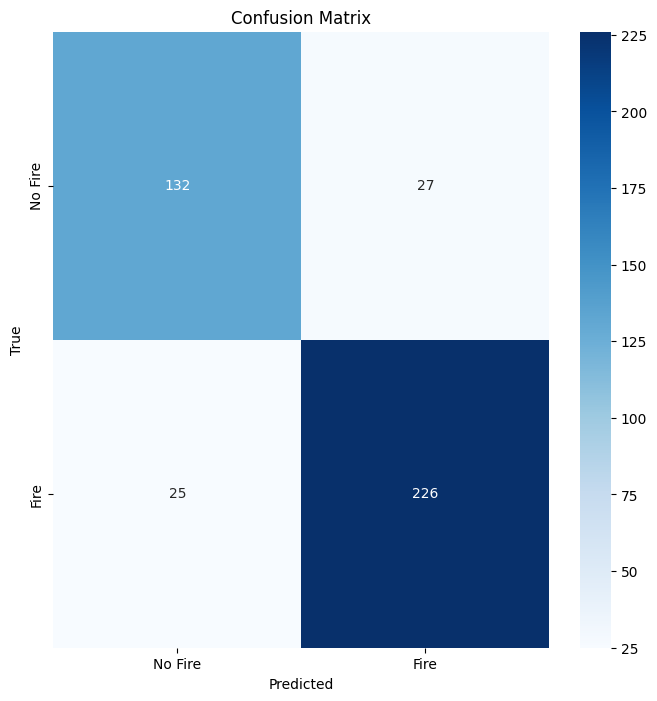

[INFO] Results saved successfully!


In [12]:
# Save Plots
print("[INFO] Saving training and evaluation results...")
plot_training(history, "outputs/vgg16_augmented_training_curve.png")
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path="outputs/vgg16_augmented_confusion_matrix.png"
)
print("[INFO] Results saved successfully!")